# Notebook I : Les états et les opérateurs quantiques

In [1]:
# required imports:
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, CXGate
import numpy as np

## les vecteurs et la notion de Dirac

Dans ce notebook, vous avez appris différentes façons de représenter les états quantiques, y compris comment utiliser la notation de Bra-Ket (Dirac).

Bien que la notation de Bra-Ket ne puisse pas être représentée exactement en code, nous pouvons représenter leurs équivalents vectoriels et matriciels avec Python.

Par exemple, nous pouvons représenter $|0\rangle$ à l'aide d'une liste python :

In [2]:
ket0 = [[1],[0]]

Nous pouvons utiliser l'un des outils de visualisation de Qiskit pour rendre nos vecteurs plus agréables à regarder :

In [3]:
array_to_latex(ket0)

<IPython.core.display.Latex object>

Essayez celui-ci

In [4]:
bra0 = [1,0]
array_to_latex(bra0)

<IPython.core.display.Latex object>

#### Exercie 1 : Créez $|1\rangle$ et $\langle1|$ avec des listes python

### Les `Statevector` de Qiskit

Dans les conférences, vous avez appris à utiliser les vecteurs d'état pour représenter les états quantiques. Vous pouvez représenter les vecteurs d'états quantiques dans le code en utilisant la classe [`Statevector`] de Qiskit (https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html).

La classe `Statevector` de Qiskit peut prendre différentes formes d'entrée (par exemple une liste python, un tableau numpy, un autre vecteur d'état) pour construire un vecteur d'état.

Prenons l'objet `bra0` que nous avons créé plus tôt et convertissons-le en un objet `Statevector` :

In [7]:
sv_bra0 = Statevector(bra0)

sv_bra0

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


In [8]:
sv_bra0.draw('latex')

<IPython.core.display.Latex object>

Nous pouvons créer des vecteurs d'état plus complexes avec plusieurs qubits de cette manière :

In [9]:
sv_eq = Statevector([1/2, 3/4, 4/5, 6/8])

sv_eq.draw('latex')

<IPython.core.display.Latex object>

Notez que le vecteur ci-dessus n'est pas un vecteur d'état valide car il n'est pas normalisé. Nous pouvons le vérifier avec la méthode is_valid() :

In [10]:
sv_eq.is_valid()

False

## Classe `Operator` de Qiskit

La classe [`Operator`] (https://qiskit.org/documentation/stubs/qiskit.quantum_info.Operator.html#qiskit.quantum_info.Operator) est utilisée dans Qiskit pour représenter les opérateurs matriciels agissant sur un système quantique. Elle dispose de plusieurs méthodes pour construire des opérateurs composites en utilisant des produits tensoriels d'opérateurs plus petits, et pour composer des opérateurs.

Une façon d'initialiser un `Operator` Qiskit est d'utiliser une liste python, comme celle que nous avons créée plus tôt :

In [11]:
op_bra0 = Operator(bra0)

op_bra0

Operator([1.+0.j, 0.+0.j],
         input_dims=(), output_dims=(2,))


La classe Operator est fournie avec quelques méthodes pratiques pour travailler avec les opérateurs, par exemple nous pouvons trouver le produit tensoriel de 2 opérateurs en utilisant la méthode `tensor()` :

In [12]:
op_ket0 = Operator(ket0)
op_bra0.tensor(op_ket0)
#print(op_bra0.tensor(op_ket0))

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j]],
         input_dims=(), output_dims=(2, 2))


### Produit intérieur et extérieur

Dans les cours, vous avez abordé les concepts de produit intérieur et de produit extérieur. Nous pouvons explorer ces concepts dans le code en utilisant les méthodes numpy `.dot()` (le produit intérieur est une forme généralisée du produit point) et `.outer()`.

Par exemple, nous pouvons trouver le produit intérieur $\langle0|0\rangle$ comme ceci :

In [14]:
braket = np.dot(op_bra0,op_ket0)
array_to_latex(braket)

<IPython.core.display.Latex object>

et le produit extérieur $|0\rangle\langle0|$ comme ceci :

In [15]:
ketbra = np.outer(ket0,bra0)
array_to_latex(ketbra)

<IPython.core.display.Latex object>

In [16]:
braket = np.dot(op_bra0,op_ket0)
array_to_latex(braket)

<IPython.core.display.Latex object>

### Ex 2 - use numpy to find the result of the following inner and outer products: $\langle1|0\rangle, \langle0|1\rangle, \langle1|1\rangle, |1\rangle\langle0|, |0\rangle\langle1|$ and $|1\rangle\langle1| $

In [17]:
op_bra1 = Operator(bra1)
op_ket1 = Operator(ket1)
# put your answer for ⟨1|0⟩ here
bra1ket0 = 

# put your answer for ⟨0|1⟩ here
bra0ket1 = 

# put your answer for ⟨1|1⟩ here
bra1ket1 = 

# put your answer for |1⟩⟨0| here
ket1bra0 = 

# put your answer for |0⟩⟨1| here
ket0bra1 = 

# put your answer for |1⟩⟨1| here
ket1bra1 = 

### Opérations déterministes

Comme indiqué dans les cours, il existe 4 opérations déterministes sur un seul bit : 
f1 = constante-0 
f2 = identité 
f3 = inversion de bit / non 
f4 = constante-1

$$
\begin{array}{c|c}
 a & f_1(a)\\
 \hline
 0 & 0\\
 1 & 0
\end{array}
\qquad
\begin{array}{c|c}
 a & f_2(a)\\
 \hline
 0 & 0\\
 1 & 1
\end{array}
\qquad
\begin{array}{c|c}
 a & f_3(a)\\
 \hline
 0 & 1\\
 1 & 0
\end{array}
\qquad
\begin{array}{c|c}
 a & f_4(a)\\
 \hline
 0 & 1\\
 1 & 1
\end{array}
$$

Nous pouvons créer des opérateurs Qiskit pour ces 4 opérations, en passant leurs représentations matricielles comme arguments à la classe `Operator`.

Par exemple, pour la constante-0, nous pouvons créer la matrice correspondante m1 de la manière suivante :

In [18]:
m1 = Operator([[1,1],[0,0]])
array_to_latex(m1)

<IPython.core.display.Latex object>

In [19]:
m3 = Operator([[0,1],[1,0]])
array_to_latex(m3)

<IPython.core.display.Latex object>

Nous pouvons également utiliser les opérations de mutliplication intégrées à python (par exemple `@`, `.dot`, ou `.matmul`) pour vérifier l'équation suivante : $ M|a\rangle = f|a\rangle $

par exemple $ M1|0\rangle = f1|0\rangle $ = 0

In [20]:
array_to_latex(m1@ket0)

<IPython.core.display.Latex object>

### Ex 3 - créer des opérateurs Qiskit pour m2 et m4 (indice : consultez les cours pour trouver les matrices appropriées)

In [21]:
# create an operator for m2 here
m2 = Operator([[1,0],[0,1]])
# create and operator for m4 here


### Opérations probabilistes

Une opération Controlled-NOT (ou CNOT) est une opération probabiliste que vous pouvez appliquer sur 2 qubits.

L'application d'une opération CNOT sur un état (X,Y) consiste à effectuer une opération NOT sur Y lorsque X est à 1, sinon à ne rien faire.
X est le bit de contrôle, Y est le bit cible.

Nous pouvons implémenter une porte CNOT (et beaucoup d'autres portes quantiques) en utilisant une classe de la [bibliothèque de circuits de Qiskit] (https://qiskit.org/documentation/apidoc/circuit_library.html) :

In [22]:
cnot = CXGate()

array_to_latex(cnot)

<IPython.core.display.Latex object>

## Opérations unitaires

Un opérateur est unitaire si : $ UU^{\dagger} = \mathbb{1} = U^{\dagger} U$

Nous pouvons vérifier si un opérateur est unitaire en utilisant Qiskit avec la méthode `is_unitary()` :

In [23]:
m3.is_unitary()

True

Avec de petits opérateurs tels que m3, nous pourrions probablement le déterminer facilement par nous-mêmes, mais avec des opérateurs plus complexes, il devient plus pratique d'utiliser la fonction Qiskit :

In [24]:
random = Operator(np.array([[ 0.50778085-0.44607116j, -0.1523741 +0.14128434j,  0.44607116+0.50778085j,
  -0.14128434-0.1523741j ],
 [ 0.16855994+0.12151822j,  0.55868196+0.38038841j, -0.12151822+0.16855994j,
  -0.38038841+0.55868196j],
 [ 0.50778085-0.44607116j, -0.1523741 +0.14128434j, -0.44607116-0.50778085j,
   0.14128434+0.1523741j ],
 [ 0.16855994+0.12151822j,  0.55868196+0.38038841j,  0.12151822-0.16855994j,
   0.38038841-0.55868196j]]))

random.is_unitary()

True

#### créer un opérateur utilisant la classe `Operator` qui n'est pas unitaire

In [28]:
# Un exemple simple
non_unitary_op = Operator([[1, 1/3],[4,1/7]])
non_unitary_op.is_unitary()

False

### Opérations unitaires du Qubit - Opérations de Pauli

Certaines des opérations unitaires les plus courantes en informatique quantique sont les opérations de Pauli. Les classes `Pauli` de Qiskit facilitent l'interaction avec les opérateurs de Pauli dans le code :

Par exemple, Pauli X ($\sigma_x$), le retournement des bits :

In [29]:
pauli_x = Pauli('X')

array_to_latex(pauli_x)

<IPython.core.display.Latex object>

Pauli Y ($\sigma_y$):

In [30]:
pauli_y = Pauli('Y')

array_to_latex(pauli_y)

<IPython.core.display.Latex object>

Pauli Z ($\sigma_z$), la flip de phase

In [31]:
pauli_z = Pauli('Z')

array_to_latex(pauli_z)

<IPython.core.display.Latex object>

In [32]:
op_x = Operator(pauli_x)

op_x

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


Utilisons la classe `Operator` et numpy pour trouver le résultat de $\sigma_x|0\rangle$

In [33]:
op_new = np.dot(op_x,ket0)

array_to_latex(op_new)

<IPython.core.display.Latex object>

### Ex4 Appliquez l'opérateur Pauli-Z sur $|1\rangle$

In [34]:
##Votre code ici


### L'opérateur Hadamard

La porte de Hadamard est l'une des opérations unitaires les plus importantes de l'informatique quantique. Nous pouvons implémenter une porte de Hadamard (et de nombreuses autres portes quantiques) en utilisant une classe de la [bibliothèque de circuits de Qiskit] (https://qiskit.org/documentation/apidoc/circuit_library.html) :

In [35]:
hadamard = HGate()

array_to_latex(hadamard)

<IPython.core.display.Latex object>

Vous pouvez convertir de nombreuses classes Qiskit en opérateurs pour utiliser les fonctions spécifiques à la classe `Operator`, comme `is_unitary`

In [36]:
hop = Operator(hadamard)
hop.is_unitary()

True

## Circuits quantiques

Dans les cours, vous avez appris à créer un circuit quantique en utilisant un CNOT et une porte de Hadamard. Ce circuit crée l'état de Bell $|\phi^+\rangle$. Nous pouvons l'implémenter en utilisant la classe `QuantumCircuit` de Qiskit :

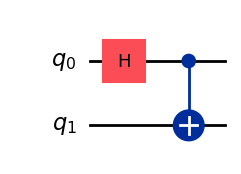

In [37]:
bell = QuantumCircuit(2)

bell.h(0) # apply an H gate to the circuit
bell.cx(0,1) # apply a CNOT gate to the circuit

bell.draw(output="mpl")

Si nous voulons vérifier quelle est la représentation matricielle de cet état quantique, nous pouvons convertir le circuit directement en un opérateur :

In [38]:
bell_op = Operator(bell)

array_to_latex(bell_op)

<IPython.core.display.Latex object>

#### Ex 5 - L'état GHZ est similaire à l'état de Bell mais appliqué à 3 qubits. Créez un circuit quantique produisant l'état GHZ.

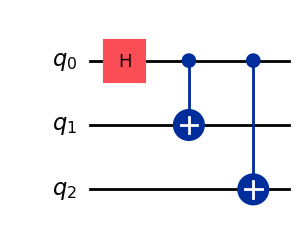

In [39]:
ghz = QuantumCircuit(3)

##############################
# ajoutez les portes quantiques 
     # applier une porte Hadamard sur le premier qubit
     # ajoute une porte CX sur les qubits 1 (qubit de contrôle), qubits 2 (qubit de cible)
     # ajoute une porte CX sur les qubits 1 (qubit de contrôle), qubits 3 (qubit de cible)

##############################

ghz.draw(output='mpl')

### Measuring Quantum states

Nous pouons trouver la probabilité des résultats de mesure en prenant la valeur absolue au carré des entrées d'un vecteur d'état quantique.

Par exemple, lors de la mesure de l'état + : 

$+\rangle = \frac{1}{\sqrt2}|0\rangle + \frac{1}{\sqrt2}|1\rangle $

La probabilité de mesurer 0 ou 1 est donnée par ce qui suit :

$ Pr(0) = |\frac{1}{\sqrt2}|^2 = \frac{1}{2}$ 
$ Pr(1) = |\frac{1}{\sqrt2}|^2 = \frac{1}{2}$

Créons un $|+\rangle$ en utilisant la classe `Statevector` :

In [40]:
plus_state = Statevector.from_label("+")

plus_state.draw('latex')

<IPython.core.display.Latex object>

In [41]:
plus_state

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


Nous allons calculer la probabilité de mesurer 0 ou 1

In [42]:
plus_state.probabilities_dict()

{np.str_('0'): np.float64(0.4999999999999999),
 np.str_('1'): np.float64(0.4999999999999999)}

L'objet dictionnaire ci-dessus vous montre tous les résultats de mesure possibles et la probabilité de les obtenir. L'acte de mesurer force l'état à s'effondrer dans l'état 0 ou 1 :

In [44]:
# exécuter cette cellule plusieurs fois pour montrer l'effondrement dans l'un ou l'autre état
res = plus_state.measure()

res


(np.str_('0'),
 Statevector([1.+0.j, 0.+0.j],
             dims=(2,)))

Nous pouvons mettre en œuvre le même état $|+\rangle$ avec une mesure en utilisant un circuit quantique :

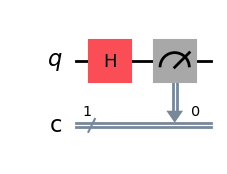

In [45]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0, 0)

qc.draw(output="mpl")

Si nous exécutions ce circuit à l'aide d'un simulateur, nous obtiendrions les mêmes résultats qu'avec la classe statevector.

Dans l'exemple suivant, utilisons la classe `Statevector` pour trouver les résultats de mesure d'un état dépendant et probabiliste. Nous allons trouver les probabilités de mesure pour l'état de Bell à 2 qubits $|\phi^+\rangle$ :

In [46]:
sv_bell = Statevector([np.sqrt(1/2), 0, 0, np.sqrt(1/2)])

sv_bell.draw('latex')

<IPython.core.display.Latex object>

In [47]:
sv_bell.probabilities_dict()

{np.str_('00'): np.float64(0.5000000000000001),
 np.str_('11'): np.float64(0.5000000000000001)}

#### Ex 6 - En utilisant la classe des vecteurs d'état, trouvez les probabilités pour les 3 autres états de la base de Bell : $|\psi^+\rangle$, $|\psi^-\rangle$, $|\phi^-\rangle$. Conseil : consultez la leçon 2 pour vous rafraîchir la mémoire sur les équations des états de Bell.

In [55]:
# Créer un état |𝜓+⟩ ici


In [57]:
sv_psi_plus.draw('latex')

<IPython.core.display.Latex object>

In [60]:
# Trouver les probabilités pour |𝜓+⟩ 
prob_psi_plus = sv_psi_plus.probabilities_dict()
sv_psi_plus.probabilities_dict()

{np.str_('01'): np.float64(0.5000000000000001),
 np.str_('10'): np.float64(0.5000000000000001)}

In [51]:
# créer un état |𝜓−⟩ ici
sv_psi_minus = Statevector([0,np.sqrt(1/2),-np.sqrt(1/2),0])
# trouver les probabilités pour |𝜓−⟩ 
prob_psi_minus = sv_psi_minus.probabilities_dict()

In [61]:
# créer un état |𝜙−⟩ 
sv_phi_minus = Statevector([np.sqrt(1/2), 0, 0, -np.sqrt(1/2)])
sv_psi_minus.draw('latex')

<IPython.core.display.Latex object>

In [62]:

# trouver les probabilités pour |𝜙−⟩ 
prob_phi_minus = sv_phi_minus.probabilities_dict()
sv_phi_minus.probabilities_dict()

{np.str_('00'): np.float64(0.5000000000000001),
 np.str_('11'): np.float64(0.5000000000000001)}

### Générer un circuit QFT

[La transformée de Fourier (https://en.wikipedia.org/wiki/Fourier_transform) se présente sous de nombreux formats différents dans l'informatique classique, dans des domaines allant du traitement des signaux à la compression des données en passant par la théorie de la complexité. La transformée de Fourier quantique (QFT) est l'implémentation quantique de la transformée de Fourier discrète sur les amplitudes d'une fonction d'onde. Elle fait partie de nombreux algorithmes quantiques, notamment l'algorithme de factorisation de Shor et l'estimation quantique de la phase. Nous aimerions que vous utilisiez Qiskit pour créer le circuit QFT suivant sur 2 qubits :

#### Ex 7 - créer un circuit QFT à 2 qubits en utilisant qiskit

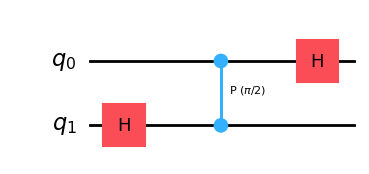

In [64]:
qft = QuantumCircuit(2)

##############################
# créer le circuit quantique ici
 # appliquer une porte Hadamard sur le 2ème qubit



##############################

qft.draw(output='mpl')